<div style="background-color:#daee8420; line-height:1.5; text-align:center;border:2px solid black;">
    <div style="color:#7B242F; font-size:24pt; font-weight:700;">The Ultimate Machine Learning Mastery Course with Python</div>
</div>

---
### **Course**: The Ultimate Machine Learning Course with Python  
#### **Chapter**: Regression  
##### **Lesson**: Linear Regression With Scikit-Learn With Synthetic Data
###### **Author:** Dr. Saad Laouadi   
###### **Copyright:** Dr. Saad Laouadi    


### Objective: 
The main objectives of this lesson is:

1.	**Generate synthetic data using `make_regression` from sklearn.datasets.**
2.	**Train a linear regression model with LinearRegression from `sklearn.linear_model`.**
3.	**Evaluate the model using standard regression metrics.**

---

## License

**This material is intended for educational purposes only and may not be used directly in courses, video recordings, or similar without prior consent from the author. When using or referencing this material, proper credit must be attributed to the author.**

```text
#**************************************************************************
#* (C) Copyright 2024 by Dr. Saad Laouadi. All Rights Reserved.           *
#**************************************************************************                                                                    
#* DISCLAIMER: The author has used their best efforts in preparing        *
#* this content. These efforts include development, research,             *
#* and testing of the theories and programs to determine their            *
#* effectiveness. The author makes no warranty of any kind,               *
#* expressed or implied, with regard to these programs or                 *
#* to the documentation contained within. The author shall not            *
#* be liable in any event for incidental or consequential damages         *
#* in connection with, or arising out of, the furnishing,                 *
#* performance, or use of these programs.                                 *
#*                                                                        *
#* This content is intended for tutorials, online articles,               *
#* and other educational purposes.                                        *
#**************************************************************************
```

In [3]:
# Environment Setup
import os 
import sys
from pathlib import Path

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score


%load_ext autoreload
%autoreload 2
%load_ext watermark

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# show information about the system
%watermark -iv -v

Python implementation: CPython
Python version       : 3.12.5
IPython version      : 8.26.0

sys       : 3.12.5 | packaged by conda-forge | (main, Aug  8 2024, 18:32:50) [Clang 16.0.6 ]
sklearn   : 1.5.1
matplotlib: 3.9.2
pandas    : 2.2.2
numpy     : 1.26.4



### Simple Linear Regression

In [16]:
# Step 1: Generate synthetic data
# We will generate data for a linear regression problem with some noise
X, y = make_regression(n_samples=1000,    # Number of data points
                       n_features=1,      # Single feature (1D data)
                       noise=20,          # Adding some noise to make it more realistic
                       random_state=0)    # For reproducibility

The Root Mean Squared Error (RMSE): 20.1843259478254
The Mean Absolute Error (MAE): 15.878469268545123
R-squared (R2 Score): 0.9335723974735131


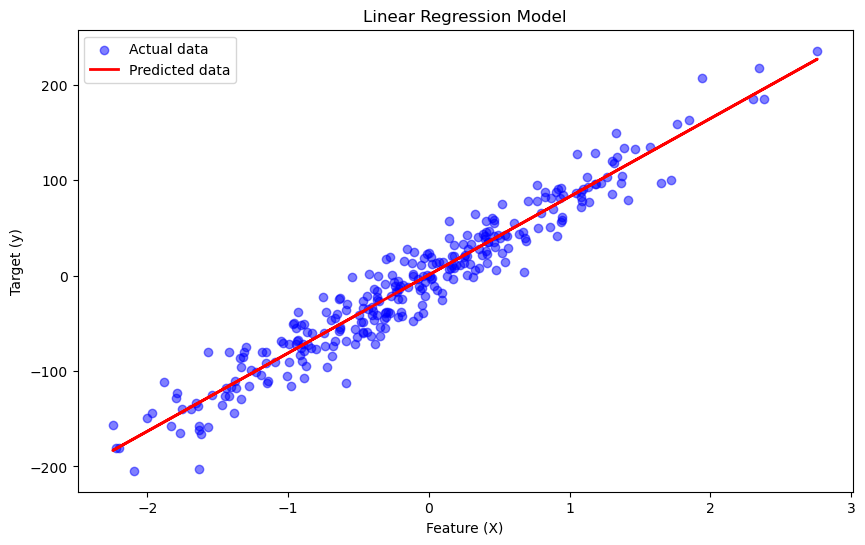

In [17]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=0)

# Step 3: Create a Linear Regression model and train it
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"The Root Mean Squared Error (RMSE): {rmse}")
print(f"The Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2 Score): {r2}")

# Step 6: Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="blue", label="Actual data", alpha=0.5)
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted data")
plt.title("Linear Regression Model")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()

### Multiple Linear Regression

First few rows of the dataset:
         X1         X2         X3           y
0  3.745401  17.405317  63.085284 -180.462000
1  9.507143  31.676038  62.348940 -122.514759
2  7.319939  44.917833  95.312729 -219.779721
3  5.986585  39.288995  62.477310 -118.905570
4  1.560186  42.262446  63.597486 -112.642422

Model Coefficients:
Intercept (beta_0): 6.174671898708311
Coefficient for X1 (beta_1): 2.4486490749478302
Coefficient for X2 (beta_2): 2.9669755121651873
Coefficient for X3 (beta_3): -3.9979961690210155

Model Performance:
Root Mean Squared Error (MSE): 5.268257130134199
R-squared (R2): 0.9938250551024852


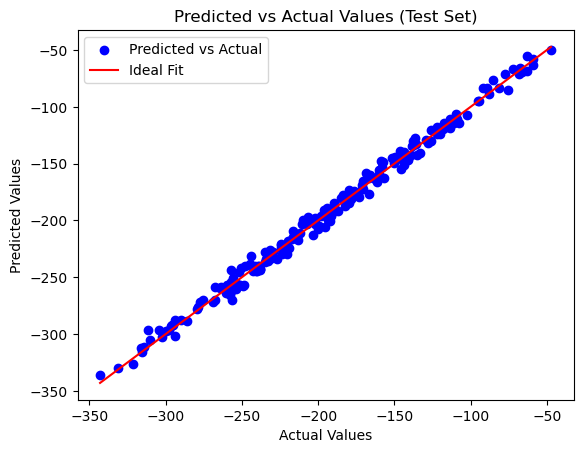

In [18]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for multiple linear regression
# Number of samples
n_samples = 1000

# Independent variables (X1, X2, X3)
X1 = np.random.uniform(0, 10, size=n_samples)
X2 = np.random.uniform(10, 50, size=n_samples)
X3 = np.random.uniform(50, 100, size=n_samples)

# Coefficients for the regression equation
beta_0 = 5                                # Intercept
beta_1 = 2.5                              # Coefficient for X1
beta_2 = 3.0                              # Coefficient for X2
beta_3 = -4.0                             # Coefficient for X3

# Generate dependent variable (y) using the linear regression equation
noise = np.random.normal(0, 5, size=n_samples)                        # Adding some noise
y = beta_0 + beta_1 * X1 + beta_2 * X2 + beta_3 * X3 + noise

# Create a DataFrame for better organization
df = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'X3': X3,
    'y': y
})

# Display first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Split the dataset into training and testing sets (80% train, 20% test)
X = df[['X1', 'X2', 'X3']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the model parameters and evaluation metrics
print("\nModel Coefficients:")
print(f"Intercept (beta_0): {model.intercept_}")
print(f"Coefficient for X1 (beta_1): {model.coef_[0]}")
print(f"Coefficient for X2 (beta_2): {model.coef_[1]}")
print(f"Coefficient for X3 (beta_3): {model.coef_[2]}")

print("\nModel Performance:")
print(f"Root Mean Squared Error (MSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Visualize the predicted vs actual values for the test set

plt.scatter(y_test, y_pred, color='blue', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values (Test Set)")
plt.legend()
plt.show()

In [19]:
min(y_test)

-343.0582292376449

In [22]:
print(([min(y_test), max(y_test)], [min(y_test), max(y_test)]))

([-343.0582292376449, -47.256626674180595], [-343.0582292376449, -47.256626674180595])


First few rows of the dataset:
         X1        X2        X3          y
0 -0.189120 -1.330314  0.921650 -96.182753
1 -0.653329 -0.474945  1.765454 -60.287273
2 -0.224856  0.076852 -0.650003 -28.193682
3  0.570599 -0.662624 -0.763259 -12.697170
4  0.327880 -0.125454  0.085893  11.714149

Model Coefficients:
Intercept (beta_0): -0.44603983341739495
Coefficient for X1 (beta_1): 98.42373844493815
Coefficient for X2 (beta_2): 82.92962217102112
Coefficient for X3 (beta_3): 25.842087440626557

Model Performance:
Root Mean Squared Error (RMSE): 10.144493145539377
R-squared (R2): 0.993692979363032


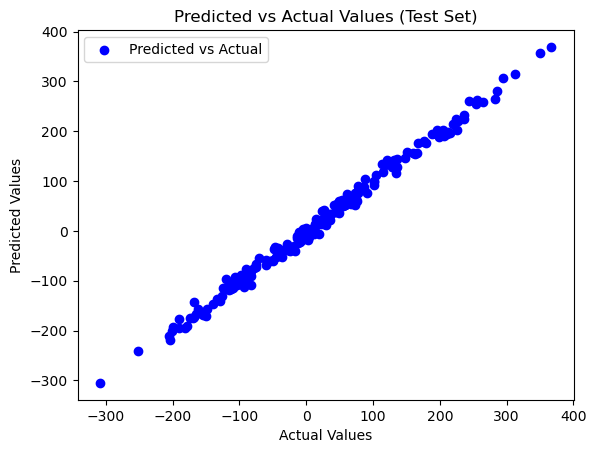

In [25]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for multiple linear regression using make_regression
X, y = make_regression(n_samples=1000, n_features=3, noise=10.0, coef=False, random_state=42)

# Convert to a DataFrame for better organization
df = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])
df['y'] = y

# Display first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Split the dataset into training and testing sets (80% train, 20% test)
X = df[['X1', 'X2', 'X3']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the model parameters and evaluation metrics
print("\nModel Coefficients:")
print(f"Intercept (beta_0): {model.intercept_}")
print(f"Coefficient for X1 (beta_1): {model.coef_[0]}")
print(f"Coefficient for X2 (beta_2): {model.coef_[1]}")
print(f"Coefficient for X3 (beta_3): {model.coef_[2]}")

print("\nModel Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Visualize the predicted vs actual values for the test set

plt.scatter(y_test, y_pred, color='blue', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values (Test Set)")
plt.legend()
plt.show()